In [1]:
# Initial Setup.
import pandas as pd
import re
import numpy as np
import math
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Mastodon_SaiGinny/'

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)


Mounted at /content/gdrive


In [2]:
df_twitter = pd.read_json(path+'zeeschuimer_4.ndjson', lines=True)

In [3]:
df_twitter

,nav_index,item_id,timestamp_collected,source_platform,source_platform_url,source_url,user_agent,data,id
0,4:11:NaN,1719101666031530496,2024-06-02 02:11:59.387,twitter.com,https://x.com/search?f=live&q=mastodon%20(researcher%20OR%20researchers%20OR%20academic%20OR%20academics%20OR%20professor%20OR%20professors%20OR%20scholar%20OR%20scholars)%20lang%3Aen%20until%3A2023-11-01%20since%3A2022-09-01&src=typed_query,https://x.com/i/api/graphql/TQmyZ_haUqANuyBcFBLkUw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22mastodon%20(researcher%20OR%20researchers%20OR%20academic%20OR%20academics%20OR%20professor%20OR%20professors%20OR%20scholar%20OR%20scholars)%20lang%3Aen%20until%3A2023-11-01%20since%3A2022-09-01%22%2C%22count%22%3A20%2C%22cursor%22%3A%22DAADDAABCgABF9zVyQvWsGYKAAIX24xa0ldQWwAIAAIAAAACCAADAAAAAAgABAAAAAAKAAUY8IqggMAnEAoABhjwiqCAv9jwAAA%22%2C%22querySource%22%3A%22typed_query%22%2C%22product%22%3A%22Latest%22%7D&features=%7B%22rweb_tipjar_consumption_enabled%22%3Atrue%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Atrue%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22communities_web_enable_tweet_community_results_fetch%22%3Atrue%2C%22c9s_tweet_anatomy_moderator_badg...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:126.0) Gecko/20100101 Firefox/126.0,"{'__typename': 'Tweet', 'rest_id': '1719101666031530399', 'core': {'user_results': {'result': {'__typename': 'User', 'id': 'VXNlcjoxMzg1ODEwODc=', 'rest_id': '138581087', 'affiliates_highlighted_label': {}, 'has_graduated_access': True, 'is_blue_verified': False, 'profile_image_shape': 'Circle', 'legacy': {'can_dm': False, 'can_media_tag': True, 'created_at': 'Thu Apr 29 23:40:33 +0000 2010', 'default_profile': True, 'default_profile_image': False, 'description': 'Smarmy attorney. Captain of chivalry. Baron of decency. Tadpole of villainy. Yeoman, Starfleet. If knaves persist and insist, I shall resist till they desist.', 'entities': {'description': {'urls': []}}, 'fast_followers_count': 0, 'favourites_count': 22772, 'followers_count': 5072, 'friends_count': 5158, 'has_custom_timelines': True, 'is_translator': False, 'listed_count': 15, 'location': 'Antifa Headquarters, MI', 'media_count': 2177, 'name': 'Barredbard 🇺🇦 (@Barredbard@mastodon.world)', 'normal_followers_count': 5072, '...",7292
1,4:11:NaN,1719097953728492032,2024-06-02 02:11:59.388,twitter.com,https://x.com/search?f=live&q=mastodon%20(researcher%20OR%20researchers%20OR%20academic%20OR%20academics%20OR%20professor%20OR%20professors%20OR%20scholar%20OR%20scholars)%20lang%3Aen%20until%3A2023-11-01%20since%3A2022-09-01&src=typed_query,https://x.com/i/api/graphql/TQmyZ_haUqANuyBcFBLkUw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22mastodon%20(researcher%20OR%20researchers%20OR%20academic%20OR%20academics%20OR%20professor%20OR%20professors%20OR%20scholar%20OR%20scholars)%20lang%3Aen%20until%3A2023-11-01%20since%3A2022-09-01%22%2C%22count%22%3A20%2C%22cursor%22%3A%22DAADDAABCgABF9zVyQvWsGYKAAIX24xa0ldQWwAIAAIAAAACCAADAAAAAAgABAAAAAAKAAUY8IqggMAnEAoABhjwiqCAv9jwAAA%22%2C%22querySource%22%3A%22typed_query%22%2C%22product%22%3A%22Latest%22%7D&features=%7B%22rweb_tipjar_consumption_enabled%22%3Atrue%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Atrue%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22communities_web_enable_tweet_community_results_fetch%22%3Atrue%2C%22c9s_tweet_anatomy_moderator_badg...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:126.0) Gecko/20100101 Firefox/126.0,"{'__typename': 'Tweet', 'rest_id': '1719097953728491982', 'core': {'user_results': {'result': {'__t

In [4]:
df_twitter.columns

Index(['nav_index', 'item_id', 'timestamp_collected', 'source_platform', 'source_platform_url', 'source_url', 'user_agent', 'data', 'id'], dtype='object')

In [5]:
df_twitter=pd.json_normalize(df_twitter['data'])

In [6]:
df_twitter

,__typename,rest_id,is_translatable,source,id,promoted,core.user_results.result.__typename,core.user_results.result.id,core.user_results.result.rest_id,core.user_results.result.has_graduated_access,core.user_results.result.is_blue_verified,core.user_results.result.profile_image_shape,core.user_results.result.legacy.can_dm,core.user_results.result.legacy.can_media_tag,core.user_results.result.legacy.created_at,core.user_results.result.legacy.default_profile,core.user_results.result.legacy.default_profile_image,core.user_results.result.legacy.description,core.user_results.result.legacy.entities.description.urls,core.user_results.result.legacy.fast_followers_count,core.user_results.result.legacy.favourites_count,core.user_results.result.legacy.followers_count,core.user_results.result.legacy.friends_count,core.user_results.result.legacy.has_custom_timelines,core.user_results.result.legacy.is_translator,core.user_results.result.legacy.listed_count,core.user_results.result.legacy.location,core.user_results.result.legacy.media_count,core.user_results.result.legacy.name,core.user_results.result.legacy.normal_followers_count,core.user_results.result.legacy.pinned_tweet_ids_str,core.user_results.result.legacy.possibly_sensitive,core.user_results.result.legacy.profile_banner_url,core.user_results.result.legacy.profile_image_url_https,core.user_results.result.legacy.profile_interstitial_type,core.user_results.result.legacy.screen_name,core.user_results.result.legacy.statuses_count,core.user_results.result.legacy.translator_type,core.user_results.result.legacy.verified,core.user_results.result.legacy.want_retweets,core.user_results.result.legacy.withheld_in_countries,edit_control.edit_tweet_ids,edit_control.editable_until_msecs,edit_control.is_edit_eligible,edit_control.edits_remaining,views.count,views.state,legacy.bookmark_count,legacy.bookmarked,legacy.created_at,legacy.conversation_id_str,legacy.display_text_range,legacy.entities.hashtags,legacy.entities.symbols,legacy.entities.timestamps,legacy.entities.urls,legacy.entities.user_mentions,legacy.favorite_count,legacy.favorited,legacy.full_text,legacy.in_reply_to_screen_name,legacy.in_reply_to_status_id_str,legacy.in_reply_to_user_id_str,legacy.is_quote_status,legacy.lang,legacy.quote_count,legacy.reply_count,legacy.retweet_count,legacy.retweeted,legacy.user_id_str,legacy.id_str,legacy.entities.media,legacy.extended_entities.media,legacy.possibly_sensitive,legacy.possibly_sensitive_editable,core.user_results.result.legacy.entities.url.urls,core.user_results.result.legacy.url,core.user_results.result.professional.rest_id,core.user_results.result.professional.professional_type,core.user_results.result.professional.category,core.user_results.result.tipjar_settings.is_enabled,core.user_results.result.tipjar_settings.patreon_handle,quoted_status_result.result.__typename,quoted_status_result.result.rest_id,quoted_status_result.result.core.user_results.result.__typename,quoted_status_result.result.core.user_results.result.id,quoted_status_result.result.core.user_results.result.rest_id,quoted_status_result.result.core.user_results.result.has_graduated_access,quoted_status_result.result.core.user_results.result.is_blue_verified,quoted_status_result.result.core.user_results.result.profile_image_shape,quoted_status_result.result.core.user_results.result.legacy.can_dm,quoted_status_result.result.core.user_results.result.legacy.can_media_tag,quoted_status_result.result.core.user_results.result.legacy.created_at,quoted_status_result.result.core.user_results.result.legacy.default_profile,quoted_status_result.result.core.user_results.result.legacy.default_profile_image,quoted_status_result.result.core.user_results.result.legacy.description,quoted_status_result.result.core.user_results.result.legacy.entities.description.urls,quoted_status_result.result.core.user_results.result.legacy.entities.url.urls,quoted_status_result.result.core.user_results.result.legacy.fast_followers_count,quoted_status_result.r

In [7]:
df_twitter['core.user_results.result.legacy.name']

,core.user_results.result.legacy.name
0,Barredbard 🇺🇦 (@Barredbard@mastodon.world)
1,Barredbard 🇺🇦 (@Barredbard@mastodon.world)
2,Barredbard 🇺🇦 (@Barredbard@mastodon.world)
3,klaudia jaźwińska
4,klaudia jaźwińska
...,...
13237,Julia Scott-Stevenson @jayscoh@mastodon.au
13238,Martijn Linssen (Mastodon)
13239,"Tomi T Ahonen Moved to Post, Spoutible & Mastodon"
13240,"Tomi T Ahonen Moved to Post, Spoutible & Mastodon"


In [8]:
df_twitter.shape

(13242, 390)

<ipython-input-9-4a5d029a77ed>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_twitter['legacy.created_at'] = pd.to_datetime(df_twitter['legacy.created_at'])
<ipython-input-9-4a5d029a77ed>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


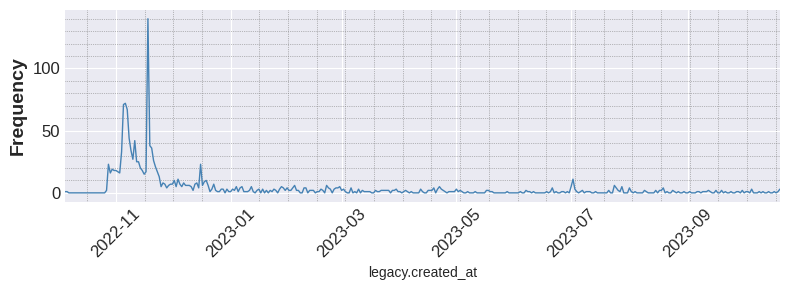

In [9]:
df_twitter['legacy.created_at'] = pd.to_datetime(df_twitter['legacy.created_at'])
df_twitter['legacy.created_at'] = df_twitter['legacy.created_at'].dt.tz_convert('UTC')
start_date = pd.Timestamp('2022-10-01', tz='UTC')
end_date = pd.Timestamp('2023-11-01', tz='UTC')
df_twitter=df_twitter.loc[(df_twitter['legacy.created_at'] <= end_date) & (df_twitter['legacy.created_at'] >= start_date)]
df_twitter = df_twitter[df_twitter['legacy.full_text'].str.contains("mastodon")]
df_twitter = df_twitter.sort_values(by='legacy.created_at')

df_twitter.set_index('legacy.created_at', inplace=True)

plt.figure(figsize=(8, 3))
plt.style.use('seaborn-darkgrid')

df_twitter.resample('D').size().plot(kind='line', linewidth=1, color='steelblue')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)


plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.show()

In [10]:
df_twitter.shape

(1497, 389)

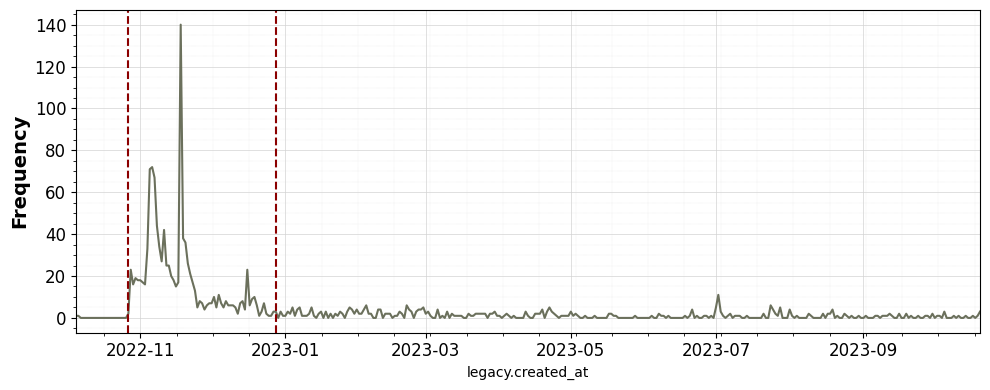

In [11]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import pandas as pd

plt.figure(figsize=(10, 4))

plt.style.use('default')


df_twitter.resample('D').size().plot(kind='line', linewidth=1.5, color='#6B705C')


plt.ylabel('Frequency', fontsize=14, fontweight='bold')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.minorticks_on()

plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
plt.grid(True, which='minor', linestyle=':', linewidth='0.25', color='lightgray')


locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.axvline(pd.to_datetime('2022-10-27'), color='darkred', linestyle='--', linewidth=1.5, label='Start Date')
plt.axvline(pd.to_datetime('2022-12-28'), color='darkred', linestyle='--', linewidth=1.5, label='End Date')

ax.set_facecolor('white')

plt.tight_layout()

plt.show()


In [12]:
df_twitter['legacy.quote_count']=df_twitter['legacy.quote_count'].astype(int)
df_twitter['legacy.reply_count']=df_twitter['legacy.reply_count'].astype(int)
df_twitter['legacy.retweet_count']=df_twitter['legacy.retweet_count'].astype(int)

<ipython-input-26-4738ec23b286>:8: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df_resampled = df_twitter[numeric_columns].resample('w').mean().fillna(0)
<ipython-input-26-4738ec23b286>:17: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  ax1.plot(df_twitter.resample('w').size(), linewidth=1.5, color='#6B705C', label='Frequency')


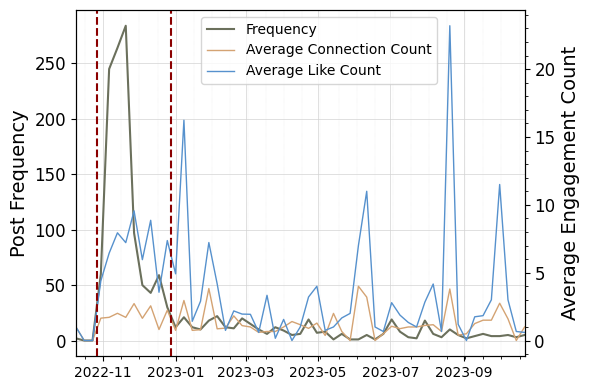

In [26]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import pandas as pd

df_twitter['engagement_total'] = df_twitter['legacy.quote_count'] + df_twitter['legacy.reply_count'] + df_twitter['legacy.retweet_count']
numeric_columns = ['engagement_total','legacy.favorite_count']
#numeric_columns = ['engagement_total']
df_resampled = df_twitter[numeric_columns].resample('w').mean().fillna(0)

earliest_time = df_resampled.index.min()
latest_time = df_resampled.index.max()

fig, ax1 = plt.subplots(figsize=(6,4))

plt.style.use('default')

ax1.plot(df_twitter.resample('w').size(), linewidth=1.5, color='#6B705C', label='Frequency')
ax1.set_ylabel('Post Frequency', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)

ax2 = ax1.twinx()

ax2.plot(df_resampled['engagement_total'], linewidth=1, color='#D4A373', label='Average Connection Count')
ax2.plot(df_resampled['legacy.favorite_count'], linewidth=1, color='#5691CD', label='Average Like Count')

ax2.set_ylabel('Average Engagement Count', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.minorticks_on()

ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax1.grid(True, which='minor', linestyle=':', linewidth='0.25', color='lightgray')

locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)

ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

plt.axvline(pd.to_datetime('2022-10-27'), color='darkred', linestyle='--', linewidth=1.5, )
plt.axvline(pd.to_datetime('2022-12-28'), color='darkred', linestyle='--', linewidth=1.5, )

ax1.set_xlim([earliest_time, latest_time])
ax1.set_facecolor('white')

fig.legend(loc='upper right', fontsize=10, bbox_to_anchor=(0.82, 1), bbox_transform=ax1.transAxes)

plt.tight_layout()

plt.show()


In [14]:
df_twitter['engagement_total']

,engagement_total
legacy.created_at,
2022-10-05 09:27:05+00:00,2
2022-10-06 11:19:47+00:00,0
2022-10-27 18:26:11+00:00,6
2022-10-27 20:56:53+00:00,0
2022-10-28 03:07:36+00:00,1
...,...
2023-10-17 15:32:19+00:00,0
2023-10-19 21:55:40+00:00,1
2023-10-20 15:08:13+00:00,2


In [15]:
df_twitter.shape

(1497, 390)

In [16]:
df_resampled = df_twitter[numeric_columns].resample('D').mean()

In [17]:
df_resampled

,engagement_total,legacy.favorite_count
legacy.created_at,,
2022-10-05 00:00:00+00:00,2.000000,1.000000
2022-10-06 00:00:00+00:00,0.000000,1.000000
2022-10-07 00:00:00+00:00,NaN,NaN
2022-10-08 00:00:00+00:00,NaN,NaN
2022-10-09 00:00:00+00:00,NaN,NaN
2022-10-10 00:00:00+00:00,NaN,NaN
2022-10-11 00:00:00+00:00,NaN,NaN
2022-10-12 00:00:00+00:00,NaN,NaN
2022-10-13 00:00:00+00:00,NaN,NaN


In [18]:
specific_day = pd.Timestamp('2023-07-02 00:00:00+00:00')

normalized_index = df_twitter.index.normalize()

filtered_df = df_twitter.loc[normalized_index == specific_day]

In [19]:
filtered_df['legacy.full_text']

,legacy.full_text
legacy.created_at,
2023-07-02 01:45:42+00:00,"@PushDustIn basically, on mastodon (which has a lot of security researchers on there) keep talking about basic problems with the most notable one being you can fake a domain or something\n\nI stopped to take note of the details because it just kept coming up"
2023-07-02 06:09:19+00:00,@jadziabiene @Professor_0711@mastodon.social
2023-07-02 07:07:07+00:00,@Irtaaza20 Many academics have moved to mastodon after Elon Musk's takeover of Twitter.
2023-07-02 07:22:57+00:00,"@SevenDeviled ""First world"" rich Indian academics should come forward and create seperate bird site (couldn't login to mastodon, don't know what happened) for preserving academic sphere and also for the aspiring ones..the onus is on you peeps😭😭"
2023-07-02 07:57:16+00:00,"@ThomasPellard I’m not on mastodon, so it’s hard for me to say. Bluesky is like early twitter having fun on internet again: bunch of good folks, but not enough academics for professional networks re emerge. Really hard to say what will become of it, if it gets bigger."
2023-07-02 08:33:07+00:00,@golgariguy Found my way to Spoutible thanks to @powrdragn. The community is a little small but it is present. I haven't checked mastodon yet.
2023-07-02 13:54:35+00:00,NEW MASTODON: @theredstonescientist@mastodon.gamedev.place
2023-07-02 14:23:50+00:00,"@virus_mania I’d say that’s totally up to your preference but if you wanna keep an eye on folk in ID model or ID epi, mastodon could be a strong option as many researchers in the uk including my colleagues are now there."
2023-07-02 16:07:55+00:00,@JamesBSumner Yes please. I was actually thinking of setting up a matrix and/or mastodon server for UK academics and such but not sure I could handle the moderation duties and whatnot on my own
